# Subscription Predict System

This dataset comprises of direct marketing campaigns (phone calls) of a Portuguese banking institution. The dataset used for this project is the Bank Marketing Data Set (bank-additional), which can be found at https://archive.ics.uci.edu/ml/datasets/Bank+Marketing. This is a Classification problem. The dataset has 4119 rows and 21 columns.

This module supported with streamlit web interface for user input. 

**Problem:** if the client will subscribe a term deposit

## Attributes

### bank client data:
**1** - age (numeric)  
**2** - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
**3** - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
**4** - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
**5** - default: has credit in default? (categorical: 'no','yes','unknown')  
**6** - housing: has housing loan? (categorical: 'no','yes','unknown')  
**7** - loan: has personal loan? (categorical: 'no','yes','unknown')  

### related with the last contact of the current campaign:  
**8** - contact: contact communication type (categorical: 'cellular','telephone')  
**9** - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
**10** - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
**11** - duration: last contact duration, in seconds (numeric).   

### other attributes:
**12** - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
**13** - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
**14** - previous: number of contacts performed before this campaign and for this client (numeric)  
**15** - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

### social and economic context attributes
**16** - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
**17** - cons.price.idx: consumer price index - monthly indicator (numeric)  
**18** - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
**19** - euribor3m: euribor 3 month rate - daily indicator (numeric)  
**20** - nr.employed: number of employees - quarterly indicator (numeric)  

### Output variable (desired target):
**21** - y - has the client subscribed a term deposit? (binary: 'yes','no')  

## Importing Modules and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,  StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv('bank-additional.csv', sep =";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Data Exploration

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [7]:
# statistical info
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
# find unique values
data.apply(lambda x: len(x.unique()))

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

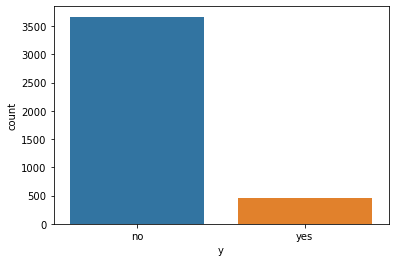

In [9]:
# Plotting the 'subscribed' frequency
sns.countplot(data=data, x='y')

<AxesSubplot:>

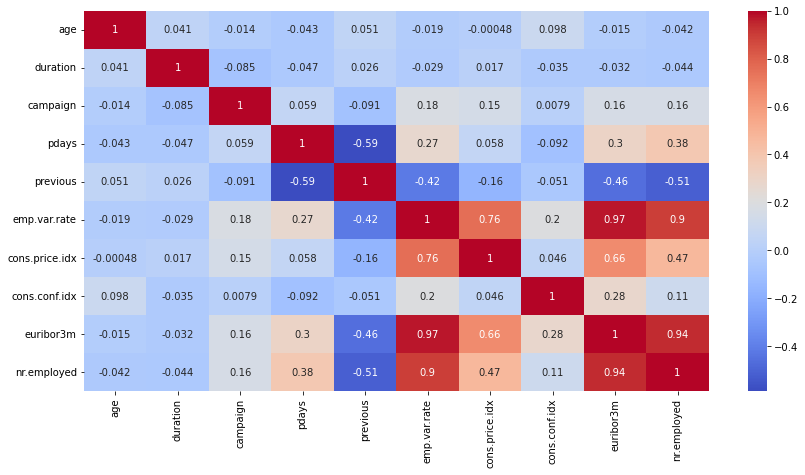

In [10]:
corr = data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Feature Engineering

### Data Cleaning

In [5]:
data=data[~data.duplicated()] #removing duplicate rows

In [11]:
#Checking for missing values in test dataset
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Data Preprocessing

In [12]:
# Categorical Columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Numerical Columns
numerical_cols = ['age', "duration",'campaign', 'pdays', 'previous', 
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'success_rate', 'contacted_before']
# Education Categories
edu_categories = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 
                  'basic.9y', 'high.school', 'professional.course', 'university.degree']
# Creating A Preprocessor
preprocessor = ColumnTransformer([
    ("numeric_scaler", StandardScaler(), numerical_cols),
    ('minmaxscaling', MinMaxScaler(), numerical_cols),
    ('ordinal_encoder_edu', OrdinalEncoder(categories=[edu_categories]), ['education']),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols[1:])
])

### Feature Selection

In [13]:
feature_selection = SelectKBest(score_func=f_classif, k=10)

### Creating New Feature

In [14]:
# Create contacted_before feature
data['contacted_before'] = (data['pdays'] != 999).astype(int) # New column with 1 if pdays is not 999, 0 otherwise

# Create success_rate feature
input_data_df['success_rate'] = (input_data_df['poutcome'].eq('success').astype(int) / input_data_df['previous']) # New column with the ratio of success to previous contacts
    else:
         input_data_df['success_rate'] = 0
    input_data_df['success_rate'] = input_data_df['success_rate'].fillna(0) # Replacing NaN values with 0

## Model Selection

In [15]:
models = [
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier()
]

### Input Split

In [16]:
X = data.drop('y', axis=1)
y = data['y']

In [17]:
# Function For Finding the Best Model Among Models
def find_best_model(X, y):
    # Split the data into training and test sets.
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    best_model = None
    best_model_score = 0
    cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    
    for model in models:
        # Creating Pipeline
        pipeline = Pipeline([("preprocessor", preprocessor), ("feature_selection", feature_selection), ("model", model)])
        
        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
  
        f1 = f1_score(y_test, y_pred, pos_label='yes')

        if f1 > best_model_score:
            best_model = model
            best_model_score = f1

    # The best model based on evaluation metrics
    print("Best Model: ", best_model)
    print("Accuracy:", accuracy)
    print("Best Model Score: ", best_model_score)

In [18]:
find_best_model(X, y)

Best Model:  RandomForestClassifier()
Accuracy: 0.8826860841423948
Best Model Score:  0.4941176470588235


RandomForestClassifier()

## Model Training & Hyperparameter Tuning

In [20]:
# Split the data into training and test sets.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
# Creating Pipeline
pipeline = Pipeline([('preprocessor', preprocessor),
                         ('feature_selection', feature_selection),
                         ('forest', RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5))])
scores = cross_validate(pipeline, X, y, cv=cv, return_train_score=True, return_estimator=True)
print("CV score: ", np.mean(scores['test_score']))

# Define the parameter grid for Random Forest Classifier
param_grid = {
    "forest__n_estimators": [100, 200, 300], # Number of trees in the forest
    "forest__max_depth": [5, 10, 15], # Maximum depth of each tree
    "forest__min_samples_split": [2, 5, 10], # Minimum number of samples required to split a node
    "forest__min_samples_leaf": [1, 2, 5] # Minimum number of samples required to be at a leaf node
}

# Grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring="accuracy",
    cv=cv
)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Retrieve the best model and its score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best hyperparameters:", best_params)
print("Test accuracy:", accuracy)


CV score:  0.9121158434318382
Best hyperparameters: {'forest__max_depth': 5, 'forest__min_samples_leaf': 1, 'forest__min_samples_split': 2, 'forest__n_estimators': 100}
Test accuracy: 0.8980582524271845


## Creating .sav File

In [26]:
filename = 'subscription-predict-model.sav'
pickle.dump(best_model, open(filename,'wb')) 